# Baseline model

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from hms.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from hms.errors import CrossEntropyError, CrossEntropySoftmaxError, SumOfSquaredDiffsError
from hms.models import SingleLayerModel, MultipleLayerModel
from hms.initialisers import UniformInit, GlorotUniformInit
from hms.learning_rules import GradientDescentLearningRule, AdamLearningRule
from hms.data_providers import HMSDataProvider
from hms.optimisers import Optimiser
from scipy.fftpack import fft, dct
%matplotlib inline
plt.style.use('ggplot')

In [19]:
# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

train_data = HMSDataProvider('train', 'extro', rng=rng)
valid_data = HMSDataProvider('validation', 'extro', rng=rng)
input_dim, output_dim = 100, 60

In [20]:
# def train_model_and_plot_stats(
#         model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

#     data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

#     optimiser = Optimiser(
#         model, error, learning_rule, train_data, valid_data, data_monitors)

#     stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

#     # Plot the change in the validation and training set error over training.
#     fig_1 = plt.figure(figsize=(8, 4))
#     ax_1 = fig_1.add_subplot(111)
#     for k in ['error(train)', 'error(valid)']:
#         ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
#                   stats[1:, keys[k]], label=k)
#     ax_1.legend(loc=0)
#     ax_1.set_xlabel('Epoch number')    
#     return stats, keys, run_time, fig_1, ax_1

In [21]:
train_data.inputs.shape

(18483, 100)

In [22]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
init_scale = 0.01  # scale for random parameter initialisation
learning_rate = 0.001  # learning rate for gradient descent
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
hidden_dim = 100

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a parameter initialiser which will sample random uniform values
# from [-init_scale, init_scale]

param_init = UniformInit(-init_scale, init_scale, rng=rng)
# param_init = GlorotUniformInit(rng=rng)

# Create affine + softmax model
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, param_init, param_init),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, param_init, param_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, param_init, param_init),
])

# Initialise a cross entropy error object
error = SumOfSquaredDiffsError()

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# stats, keys, run_time, fig_1, ax_1 = train_model_and_plot_stats(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 851.07it/s]Epoch 5: 0.4s to complete
    error(train)=4.49e+00, acc(train)=2.78e-01, error(valid)=3.71e+00, acc(valid)=2.58e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 831.76it/s]Epoch 10: 0.4s to complete
    error(train)=4.40e+00, acc(train)=2.86e-01, error(valid)=3.78e+00, acc(valid)=2.45e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 751.80it/s]Epoch 15: 0.5s to complete
    error(train)=4.35e+00, acc(train)=2.91e-01, error(valid)=3.80e+00, acc(valid)=2.41e-01
Epoch Progress:  27%|██▋       | 101/369 [00:00<00:00, 486.92it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 603.21it/s]Epoch 20: 0.6s to complete
    error(train)=4.33e+00, acc(train)=2.94e-01, error(valid)=3.84e+00, acc(valid)=2.27e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 612.62it/s]Epoch 25: 0.6s to complete
    error(train)=4.30e+00, acc(train)=2.97e-01, error(valid)=3.89e+00, acc(valid)=2.32e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 559.23it/s]Epoch 30: 0.7s to complete
    error(train)=4.29e+00, acc(train)=2.97e-01, error(valid)=3.90e+00, acc(valid)=2.28e-01
Epoch Progress:  28%|██▊       | 104/369 [00:00<00:00, 504.79it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 614.49it/s]Epoch 35: 0.6s to complete
    error(train)=4.28e+00, acc(train)=2.99e-01, error(valid)=3.91e+00, acc(valid)=2.25e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 591.59it/s]Epoch 40: 0.6s to complete
    error(train)=4.27e+00, acc(train)=3.01e-01, error(valid)=3.95e+00, acc(valid)=2.29e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 580.81it/s]Epoch 45: 0.6s to complete
    error(train)=4.26e+00, acc(train)=3.01e-01, error(valid)=3.98e+00, acc(valid)=2.31e-01
Epoch Progress:  13%|█▎        | 48/369 [00:00<00:00, 475.54it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 612.18it/s]Epoch 50: 0.6s to complete
    error(train)=4.25e+00, acc(train)=3.02e-01, error(valid)=3.94e+00, acc(valid)=2.27e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 616.83it/s]Epoch 55: 0.6s to complete
    error(train)=4.25e+00, acc(train)=3.00e-01, error(valid)=3.95e+00, acc(valid)=2.28e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 543.61it/s]Epoch 60: 0.7s to complete
    error(train)=4.25e+00, acc(train)=3.05e-01, error(valid)=3.96e+00, acc(valid)=2.28e-01
Epoch Progress:  31%|███       | 113/369 [00:00<00:00, 547.78it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 625.65it/s]Epoch 65: 0.6s to complete
    error(train)=4.25e+00, acc(train)=3.04e-01, error(valid)=4.00e+00, acc(valid)=2.35e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 610.41it/s]Epoch 70: 0.6s to complete
    error(train)=4.25e+00, acc(train)=3.03e-01, error(valid)=3.94e+00, acc(valid)=2.35e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 580.53it/s]Epoch 75: 0.6s to complete
    error(train)=4.25e+00, acc(train)=3.03e-01, error(valid)=3.99e+00, acc(valid)=2.23e-01
Experiment Progress:  79%|███████▉  | 79/100 [00:49<00:14,  1.47it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 624.46it/s]Epoch 80: 0.6s to complete
    error(train)=4.24e+00, acc(train)=3.07e-01, error(valid)=3.98e+00, acc(valid)=2.28e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 614.50it/s]Epoch 85: 0.6s to complete
    error(train)=4.24e+00, acc(train)=3.06e-01, error(valid)=3.98e+00, acc(valid)=2.32e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 571.12it/s]Epoch 90: 0.7s to complete
    error(train)=4.24e+00, acc(train)=3.06e-01, error(valid)=3.97e+00, acc(valid)=2.27e-01
Experiment Progress:  94%|█████████▍| 94/100 [00:59<00:04,  1.49it/s]


Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 612.82it/s]Epoch 95: 0.6s to complete
    error(train)=4.24e+00, acc(train)=3.05e-01, error(valid)=4.02e+00, acc(valid)=2.30e-01
Epoch Progress: 100%|██████████| 369/369 [00:00<00:00, 610.48it/s]Epoch 100: 0.6s to complete
    error(train)=4.23e+00, acc(train)=3.05e-01, error(valid)=3.98e+00, acc(valid)=2.30e-01
Experiment Progress: 100%|██████████| 100/100 [01:03<00:00,  1.50it/s]


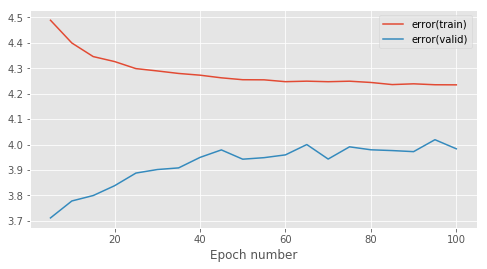

In [23]:
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

## Produce output of test sets

In [24]:
# test_data = HMSDataProvider('test1', rng=rng)
# result, evaluation = optimiser.eval_test_set(test_data, 'test')
# print('Error:    ' + str(evaluation['errortest']))

# result_reshape = np.zeros((result[-1].shape[0], 6, 10))
# for i in range(result[-1].shape[0]):
#     result_reshape[i] = result[-1][i].reshape(6,10)

# result_reshape.shape

In [25]:
def fade_motion(motion, fading_point, window_size):
#     print("Motion length: {0}, Fading point: {1}".format(len(motion), fading_point))
    scaler = 0.9
    for i in range(fading_point, window_size):
        motion[i] *= scaler
        scaler *= scaler
    return motion

Error:    0.359496298808


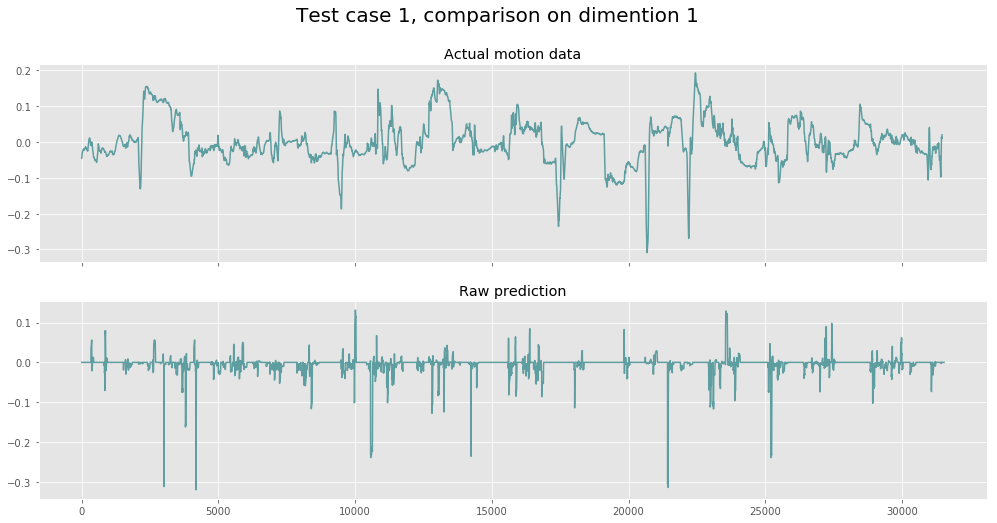

Error:    0.620764510192


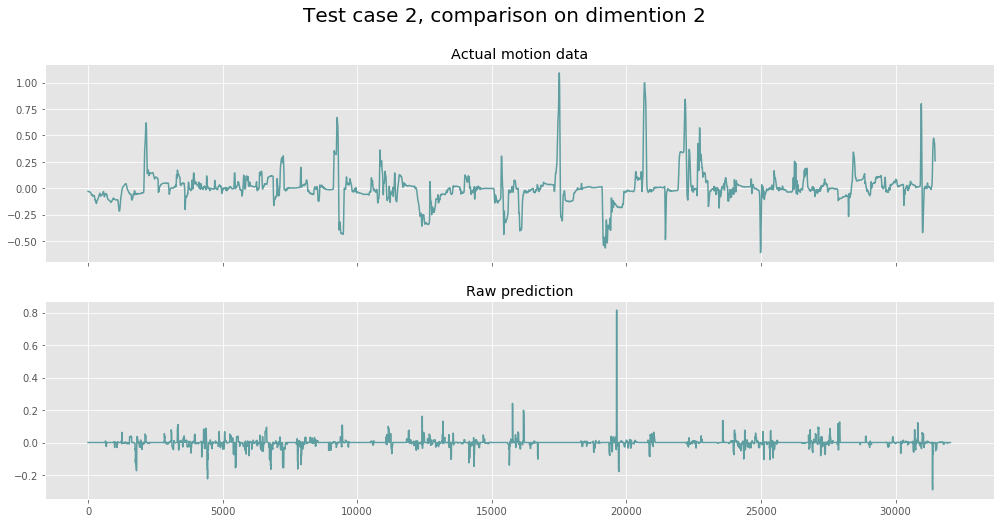

Error:    0.709633583115


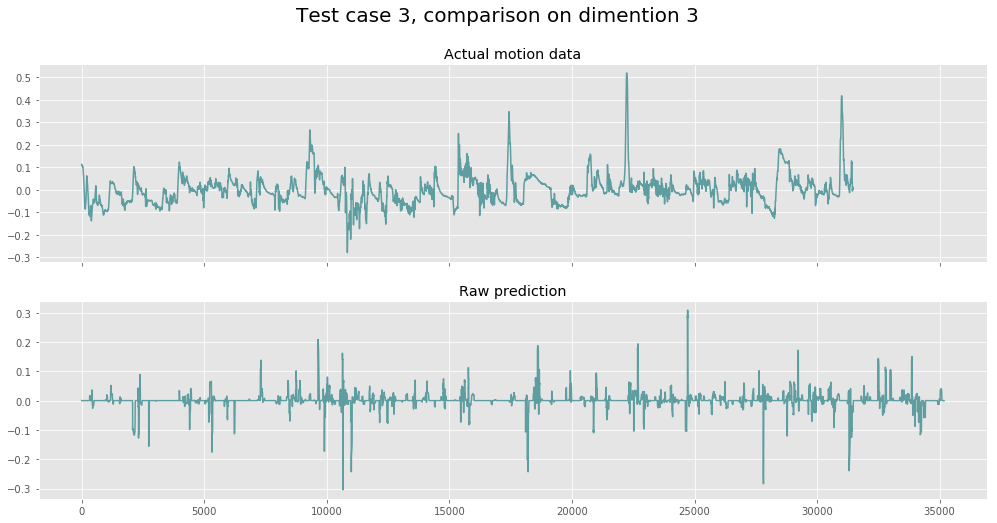

Error:    0.546853175828


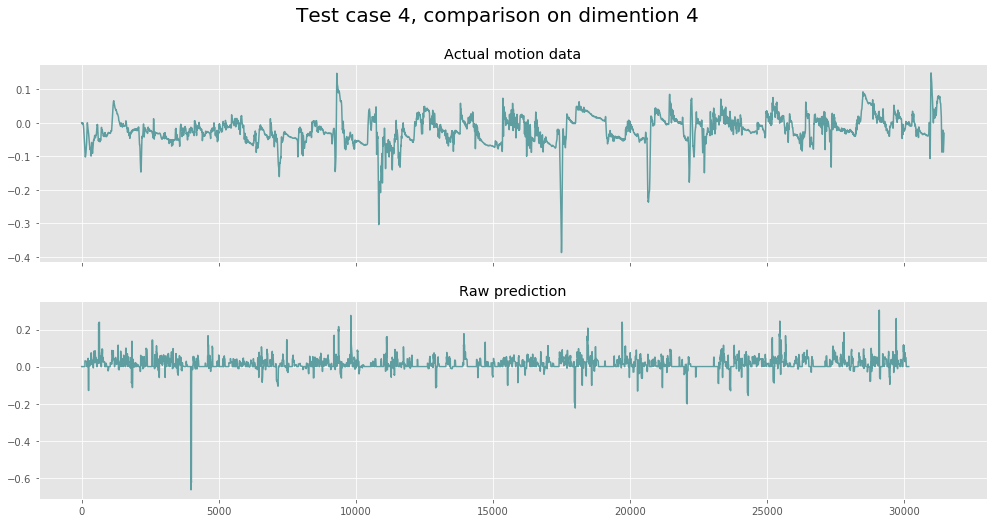

Error:    0.3477469399


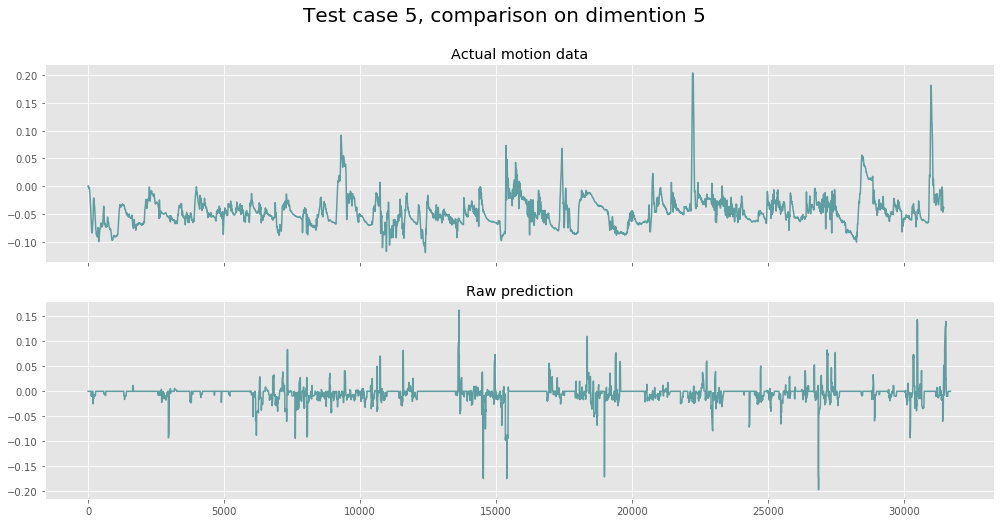

Error:    4.04589190689


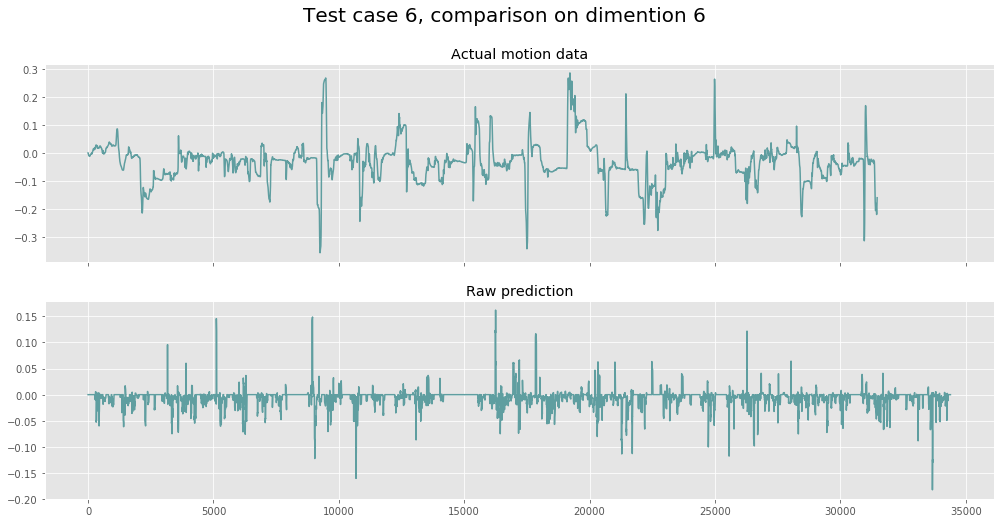

In [27]:
# Loop over 1-6 test cases

window_size = 100
for i in range(1,7):
    test_data = HMSDataProvider('test{0}'.format(i), 'extro', rng=rng)
    result, evaluation = optimiser.eval_test_set(test_data, 'test')
    print('Error:    ' + str(evaluation['errortest']))

    result_reshape = np.zeros((result[-1].shape[0], 6, 10)) # needs testig
    for j in range(result[-1].shape[0]):
        result_reshape[j] = result[-1][j].reshape(6,10)    
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
    words = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(3, 4), dtype="str")
    
    prediction = np.zeros((6, time_intervals[-1,1] + window_size))
    counter = 0
    for index, line in enumerate(time_intervals):
        word = words[index]
        word_split = word.split('\'')
        
        if len(word_split) <= 1:   
            start_time = line[0]
            end_time = line[1]
            fading_point = end_time - start_time
            
            for k in range(6):
                frame = np.zeros(window_size)
                frame[0:10] = result_reshape[counter][k]
                dct_motion = dct(frame, 3, norm="ortho")
                faded_motion = fade_motion(dct_motion, fading_point, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion 
            counter += 1
        else:
            start_time = line[0]
            end_time = line[1]
            mid = int((line[0] + line[1]) / 2)
            fading_point_1 = mid - start_time
            fading_point_2 = end_time - mid
            
            for k in range(6):
                frame_1 = np.zeros(window_size)
                frame_1[0:10] = result_reshape[counter][k]
                dct_motion_1 = dct(frame_1, 3, norm="ortho")
                faded_motion_1 = fade_motion(dct_motion_1, fading_point_1, window_size)
                prediction[k, start_time:start_time + window_size] += faded_motion_1
                
                frame_2 = np.zeros(window_size)
                frame_2[0:10] = result_reshape[counter+1][k]
                dct_motion_2 = dct(frame_2, 3, norm="ortho")
                faded_motion_2 = fade_motion(dct_motion_2, fading_point_2, window_size)
                prediction[k, mid:mid + window_size] += faded_motion_2
            counter += 2
        
    prediction = prediction.transpose()
    
    # If trained on intro data
    # np.savetxt('Predictions/TrainedOnIntroData/prediction{0}.txt'.format(i), prediction, fmt="%.7f")

    np.savetxt('Predictions/prediction{0}.txt'.format(i), prediction, fmt="%.7f")
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/1.rov".format(i), skiprows=17, usecols=range(0, 6))

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(2, sharex=True, figsize=(17,8))
    axarr[0].plot(motion_data[:,i-1], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction[:,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')

    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
    plt.savefig('Predictions/Test case {0}, comparison on dimention {1}.pdf'.format(i, i))
    plt.show()

In [45]:
def smooth_prediction(raw_prediction):
    output_shape = raw_prediction.shape
    # make a matrix that adds 20 lines paddings at the beginning & end of raw prediction
    calculation_frame = np.zeros((output_shape[0]+40, output_shape[1]))
    output = np.zeros(raw_prediction.shape)
    calculation_frame[20:-20, :] = raw_prediction
    
    for i in range(output_shape[0]):
        output[i,:] = calculation_frame[i+20,:] + \
        0.9 * (calculation_frame[i+21,:] + calculation_frame[i+19,:]) + \
        0.9 * (calculation_frame[i+22,:] + calculation_frame[i+18,:]) + \
        0.8 * (calculation_frame[i+23,:] + calculation_frame[i+17,:]) + \
        0.8 * (calculation_frame[i+24,:] + calculation_frame[i+16,:]) + \
        0.7 * (calculation_frame[i+25,:] + calculation_frame[i+15,:]) + \
        0.7 * (calculation_frame[i+26,:] + calculation_frame[i+14,:]) + \
        0.6 * (calculation_frame[i+27,:] + calculation_frame[i+13,:]) + \
        0.6 * (calculation_frame[i+28,:] + calculation_frame[i+12,:]) + \
        0.5 * (calculation_frame[i+29,:] + calculation_frame[i+11,:]) + \
        0.5 * (calculation_frame[i+30,:] + calculation_frame[i+10,:]) + \
        0.4 * (calculation_frame[i+31,:] + calculation_frame[i+9,:]) + \
        0.4 * (calculation_frame[i+32,:] + calculation_frame[i+8,:]) + \
        0.3 * (calculation_frame[i+33,:] + calculation_frame[i+7,:]) + \
        0.3 * (calculation_frame[i+34,:] + calculation_frame[i+6,:]) + \
        0.2 * (calculation_frame[i+35,:] + calculation_frame[i+5,:]) + \
        0.2 * (calculation_frame[i+36,:] + calculation_frame[i+4,:]) + \
        0.1 * (calculation_frame[i+37,:] + calculation_frame[i+3,:]) + \
        0.1 * (calculation_frame[i+38,:] + calculation_frame[i+2,:]) + \
        0.1 * (calculation_frame[i+39,:] + calculation_frame[i+1,:])
    output /= 3
    return output